# Credit Card Fraud Detection Model using Linear Regression, LDA and KNN

## Problem Statement
Create a Machine Learning model using Linear Regression, LDA and KNN Classification techniques to predict Credit Card Fraud.

## My views about the problem statement?
Machine learning models are able to make predictions faster and more accurately then any manual methods, it can help to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features. It can also help us examine how different merchant categories are associated with fraud.

## My approach for building a model:

1) Upload and analyze the data into jupyter notebook.
2) Perform Data Pre-processing like cleaning data, transforming data. Handling missing values, outliers and categorical   veriables.
3) Spliting the available data in 80:20 ration to perform training and testing of the models.
4) Training and testing the models using different classification techniques like Linear Regression, LDA and KN Neighbour methods with available data.
5) Chosing the model and classification techique with best accuracy, precision score, recall score and ROC AUC score.
6) Steps to improve the selected model's performance.

In [1]:
# importing importent libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as dm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## About Dataset
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.
Key Features 
1) id: Unique identifier for each transaction
2) V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
3) Amount: The transaction amount
4) Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [2]:
#uploading data into pandas dataset
df = pd.read_csv('C:/Users/AKSHAY TRIPATHI/OneDrive/Desktop/DATA SCIENCE/Credit Card Fraud Detection Project/archive/creditcard_2023.csv', header = 0)

In [3]:
# Looking at the available data
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# checking number of rows and columns
df.shape

(568630, 31)

In [5]:
# More info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

No missing values detected in the dataset

## Data Pre-Processing

In [6]:
# Performing EDD for numerical variables
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


### Counting total fraudulent and non-fraudulent class

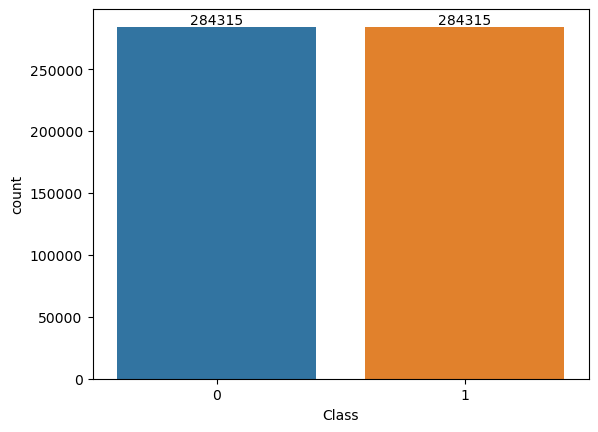

In [11]:
import matplotlib.pyplot as plt
ax = sns.countplot(data=df, x='Class')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

284315 or 50% of the transaction are fraudulent

### Plotting Transaction Amount

<Axes: xlabel='Class', ylabel='Amount'>

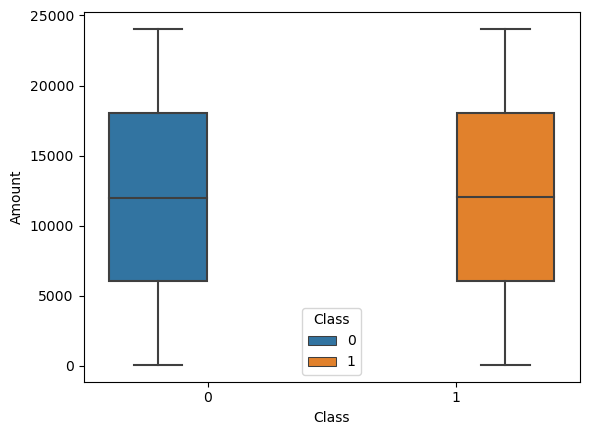

In [45]:
# plotting a box plot to visualize transaction amount in each class
sns.boxplot(x=df["Class"], y=df["Amount"], hue=df["Class"])

As we can see from the above chart the transaction amount seems to be equaly distributed in both classes

### Visualizing the data distribution in each variable of the dataset

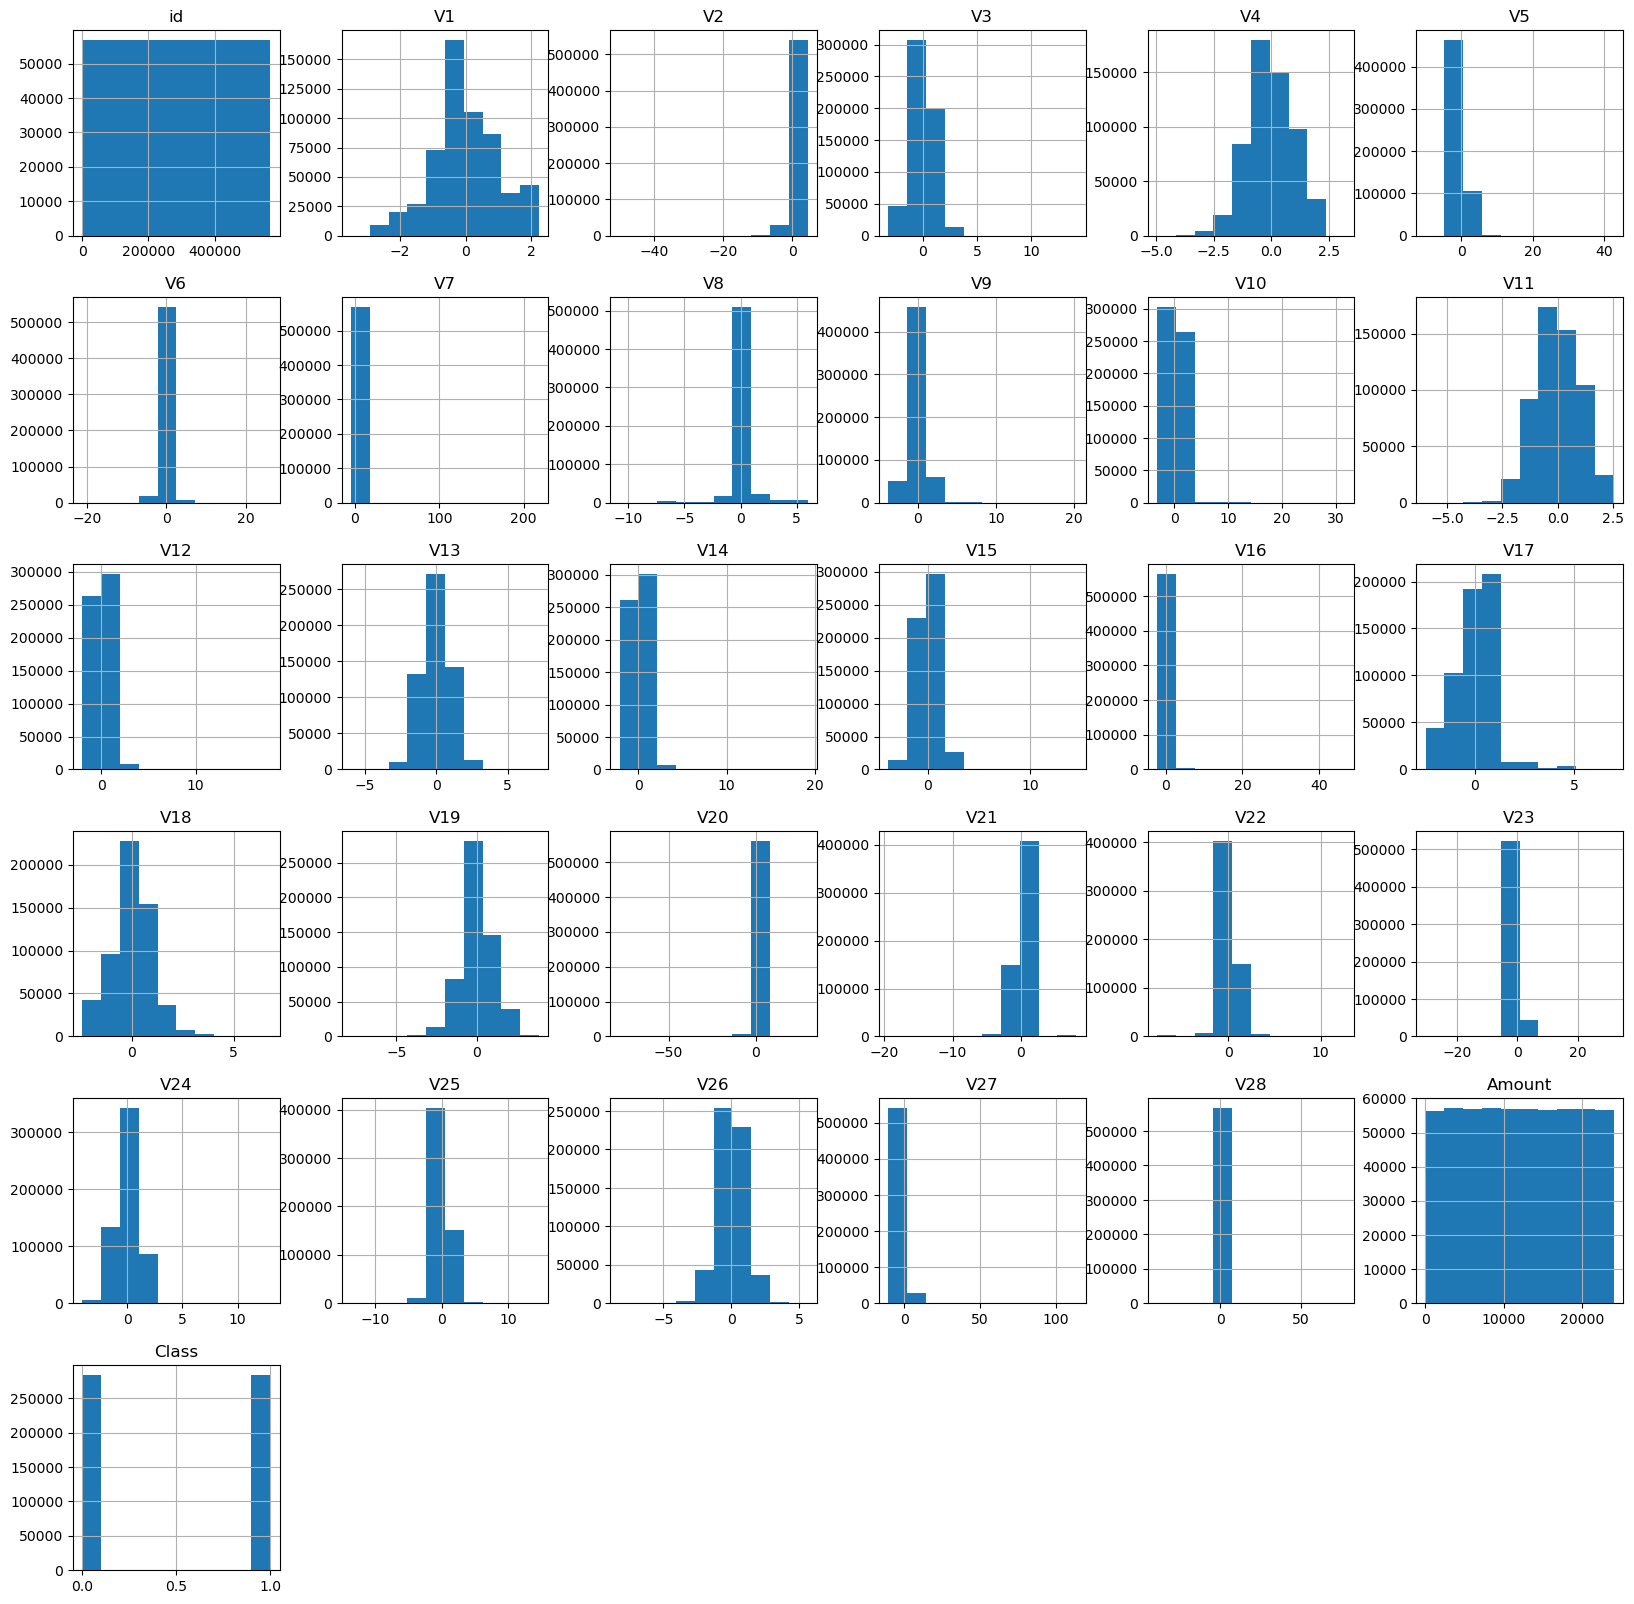

In [17]:
# plotting the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

## Creating Correlation Matrix

Creating a correlation matrix to find out any highly correlated variable in the dataset if any

In [5]:
# for those who prefer numbers
df.corr()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


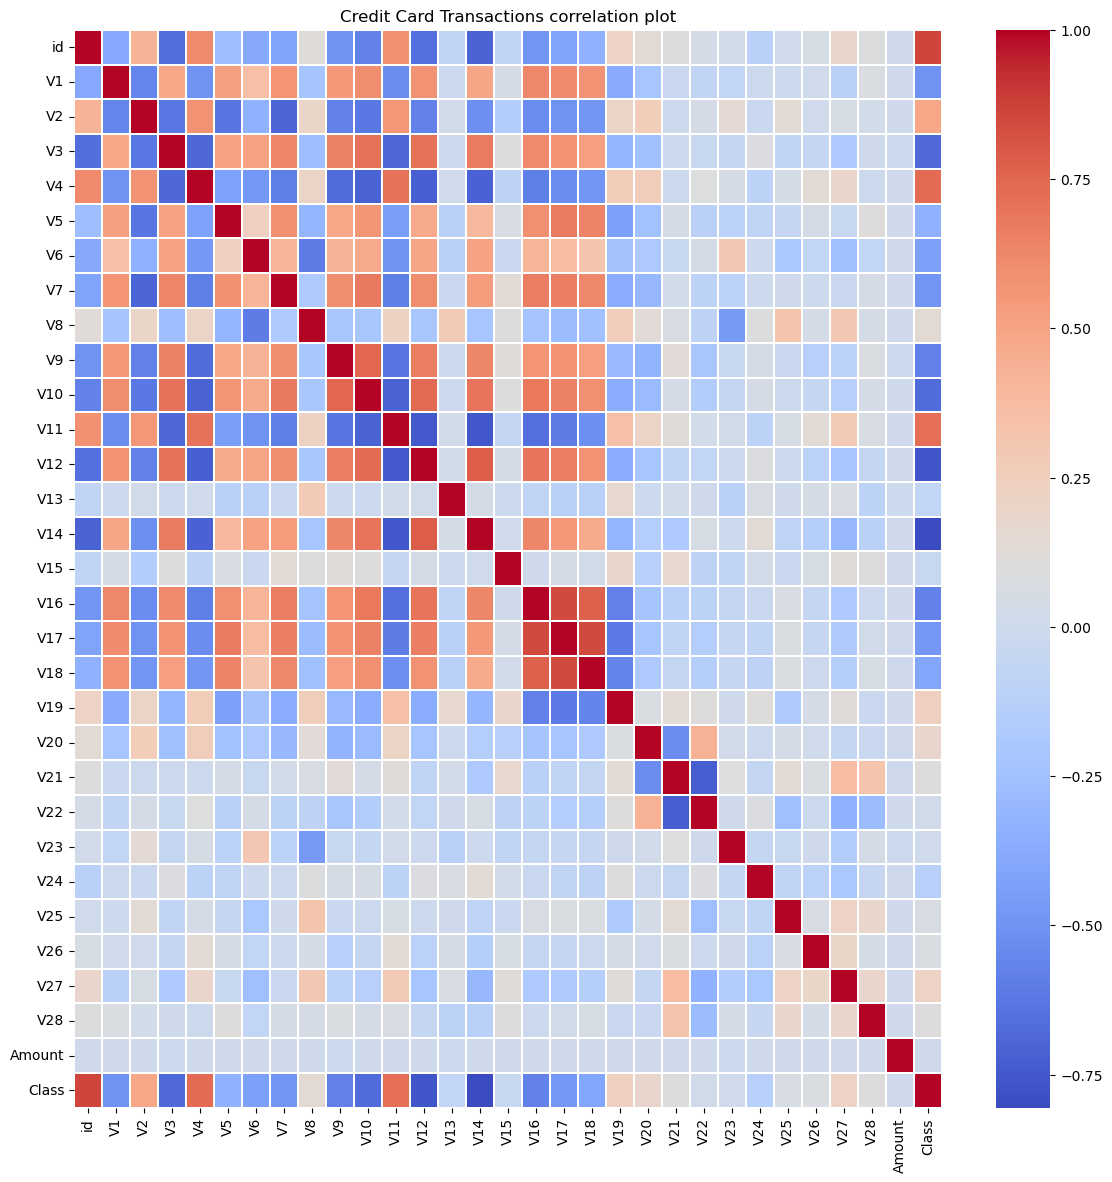

In [18]:
# for those who prefer visualization plotting a correlation heatmap
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="coolwarm")
plt.show()

No higly correleted variables found. In the above plot dark red sqaures signify high correlation.

## X-Y Split

In [19]:
# Creating X independent and Y dependent variables for regression model
X = df.loc[:,df.columns != 'Class'] # creating a variable X without class variable (Independent Variables)
X.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [21]:
# creating dependent variable Y with only class variable
Y = df['Class'] # Dependent Variable
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Now we will apply different classification techniques to train and test the data 

## Logistic Regression

### Training Data

In [22]:
# Importing the model in use
from sklearn.linear_model import LogisticRegression
# Training the model
clf_lrs=LogisticRegression()
clf_lrs.fit(X,Y)

LogisticRegression()

In [23]:
# Checking the cofficient
clf_lrs.coef_

array([[ 1.03348713e-05, -1.79239707e-08,  1.70026038e-08,
        -2.27624127e-08,  2.56290143e-08, -1.19617560e-08,
        -1.49000307e-08, -1.70803741e-08,  5.01907160e-09,
        -2.02038728e-08, -2.33206245e-08,  2.54195639e-08,
        -2.66766174e-08, -2.29989428e-09, -2.76937690e-08,
        -7.97846234e-10, -1.98288896e-08, -1.63977518e-08,
        -1.43134822e-08,  8.37529206e-09,  6.31761104e-09,
         3.75493053e-09,  2.26130257e-10,  2.59057515e-10,
        -4.45086543e-09,  2.65331582e-09,  2.55644864e-09,
         7.40171850e-09,  3.53918552e-09, -1.82597450e-04]])

In [24]:
# Checking the intercept
clf_lrs.intercept_

array([-1.58368695e-08])

## Model Performance

In [25]:
# predicting 
clf_lrs.predict_proba(X)
y_pred=clf_lrs.predict(X)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
# confusion matrix
confusion_matrix(Y,y_pred)

array([[189119,  95196],
       [ 23494, 260821]], dtype=int64)

In [27]:
# Checking accuracy
accuracy_lr = accuracy_score(Y,y_pred)
accuracy_lr

0.7912702460299316

In [28]:
# Checking precision score
precision_score(Y,y_pred)

0.7326082743239789

In [29]:
# Checking recall score
recall_score(Y,y_pred)

0.9173663014614073

This model has an test accuracy score of 79%, precision score of 73% and recall score of 91%. We need to apply other classification techniques to further increase the accuracy, precision and recall score.

## Linear Discriminant Analysis (LDA)

### Training the model

In [30]:
# Importing model to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Training and fitting the model
clf_lda=LinearDiscriminantAnalysis()
clf_lda.fit(X,Y)

LinearDiscriminantAnalysis()

### Predicting Values

In [31]:
# predicting y variable
y_pred_lda=clf_lda.predict(X)
y_pred_lda

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Model Performance

In [32]:
# confusion matrix
confusion_matrix(Y,y_pred_lda)

array([[283689,    626],
       [  5643, 278672]], dtype=int64)

In [33]:
# accuracy score
accuracy_lda = accuracy_score(Y,y_pred_lda)
accuracy_lda

0.9889752563178165

In [34]:
# Checking precision score
precision_score(Y,y_pred_lda)

0.9977586663706866

In [35]:
# Checking recall score
recall_score(Y,y_pred_lda)

0.9801522958690185

This model has an test accuracy score of 98%, precision score of 99% and recall score of 98%. This is highly accurate model with high performance numbers.

## Test Train Split
Splitting the data into 80:20 ratio to validate the model performance on an unseen data

In [36]:
# Splitting the data in 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# Analysing test and train data shape
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(454904, 30) (113726, 30) (454904,) (113726,)


## K Neighbours Classifier

### Standardising the X train and Y test data

In [37]:
# Importing model to use
from sklearn.neighbors import KNeighborsClassifier
scaler=preprocessing.StandardScaler().fit(X_train) #standardising and fitting the training set using standardscaler function
X_train_s=scaler.transform(X_train)
scaler=preprocessing.StandardScaler().fit(X_test) #standardising and fitting the test set using standardscaler function
X_test_s=scaler.transform(X_test)

### Training the Model

In [40]:
# Training and fitting the model
clf_knn3=KNeighborsClassifier(n_neighbors=3) # Training the model with K=3
clf_knn3.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=3)

### Model Performance

In [41]:
# predicting and creating confusion matrics for model K=3
confusion_matrix(y_test,clf_knn3.predict(X_test_s))

array([[56675,    49],
       [    3, 56999]], dtype=int64)

In [42]:
# checking for accuracy
accuracy_knb2=accuracy_score(y_test,clf_knn3.predict(X_test_s))
accuracy_knb2

0.9995427606703832

In [43]:
# Checking precision score
precision_score(y_test,clf_knn3.predict(X_test_s))

0.999141074183144

In [44]:
# Checking recall score
recall_score(y_test,clf_knn3.predict(X_test_s))

0.9999473702677099

This model has an test accuracy score of 99%, precision score of 99% and recall score of 99%. This is highly accurate model with high performance numbers. 

# Conclusion
The K-Nearest Neighbours (KNN) technique gives the best performing model amongs the three used in this project.This model has an test accuracy score of 99%, precision score of 99% and recall score of 99%.